### Directory, Libraries and data

In [1]:
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

### Load Data

In [3]:
df = pd.read_csv("Wine-quality-challenge.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Normal Distribution

### Density plot of Chlorides

<Axes: ylabel='Density'>

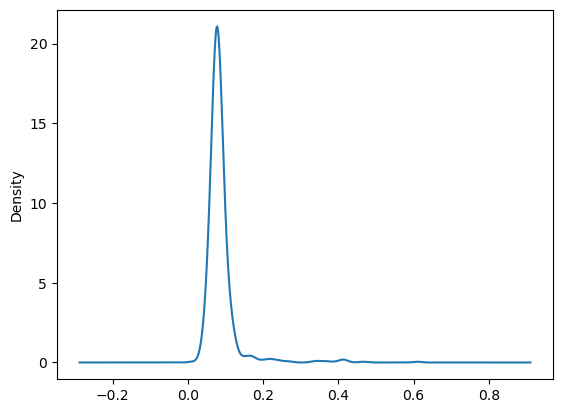

In [4]:
df.chlorides.plot.density()

### Check number of observations within X standard deviations

In [12]:
df.loc[(df.chlorides <= df.chlorides.mean() + 3 * df.chlorides.std())
      & (df.chlorides >= df.chlorides.mean() - 3 * df.chlorides.std())].chlorides.count()/df.chlorides.count()

0.9806128830519074

### Challenge: plot alcohol distribution 

<Axes: ylabel='Density'>

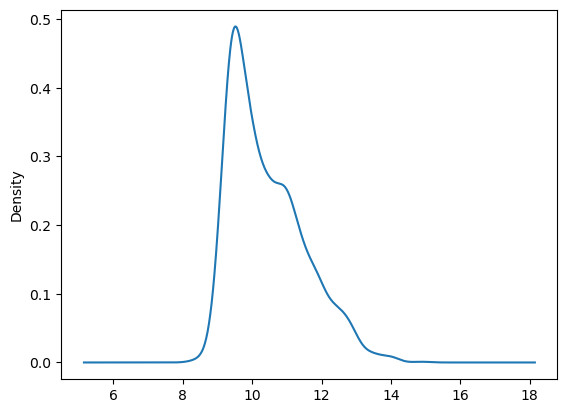

In [13]:
df.alcohol.plot.density()

### Check how many observations within 3 standard deviations

In [15]:
df.loc[(df.alcohol <= df.alcohol.mean() + 3 * df.alcohol.std())
      & (df.alcohol >= df.alcohol.mean() - 3 * df.alcohol.std())].alcohol.count()/df.alcohol.count()

0.9949968730456535

# Shapiro-Wilks Test

### Shapiro-Wilks for normality

In [18]:
stat, p = st.shapiro(df.chlorides)
print(p)

#condition
if p > 0.05:
#if yes
    print("Sample looks Gaussian/Normal (failed to reject H0)")
#if not
else:
    print('Sample does not look Gaussian/Normal (reject H0)')

0.0
Sample does not look Gaussian/Normal (reject H0)


### Shapiro Wilks Test for Sulphates and create if else condition

In [20]:
stat, p = st.shapiro(df.sulphates)
print(p)

if p > 0.05:
    print("Sample looks Gaussian/Normal (failed to reject H0)")
else:
    print("Sample does not look Gaussian/Normal (reject H0)")

5.821617678881608e-38
Sample does not look Gaussian/Normal (reject H0)


# Standard Error

### Using a function

In [4]:
st.sem(df.alcohol)

0.026650018979018173

### Us doing the computations: Standard deviations divided by square root of observations

In [5]:
df.alcohol.std() / m.sqrt(df.alcohol.count())

0.026650018979018118

### Standard Error of pH

In [6]:
st.sem(df.pH)

0.0038608683325203784

In [8]:
df.pH.std() / m.sqrt(df.pH.count())

0.0038608683325203753

# Confidence Interval

### Confidence interval of the mean of citric acid

In [13]:
print(df[['citric acid']].mean())
st.norm.interval(confidence = 0.95,
                 loc = df[['citric acid']].mean(),
                 scale = st.sem(df[['citric acid']]))

citric acid    0.270976
dtype: float64


(array([0.26142755]), array([0.28052367]))

### Histogram

array([[<Axes: title={'center': 'citric acid'}>]], dtype=object)

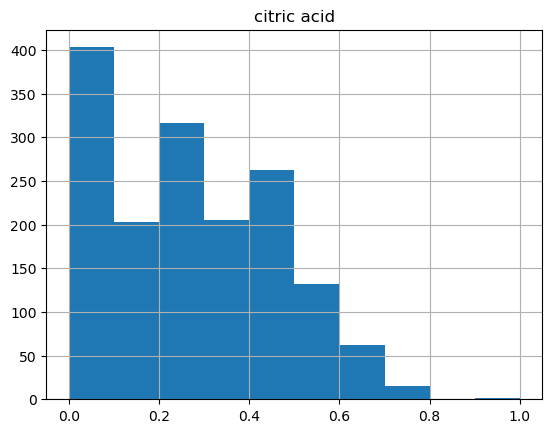

In [14]:
df[['citric acid']].hist()

### Confidence interval of the Density mean

In [15]:
print(df.density.mean())
st.norm.interval(confidence = 0.95,
                loc = df.density.mean(),
                scale = st.sem(df.density))

0.9967466791744841


(0.9966541725972521, 0.9968391857517162)

### Histogram

<Axes: >

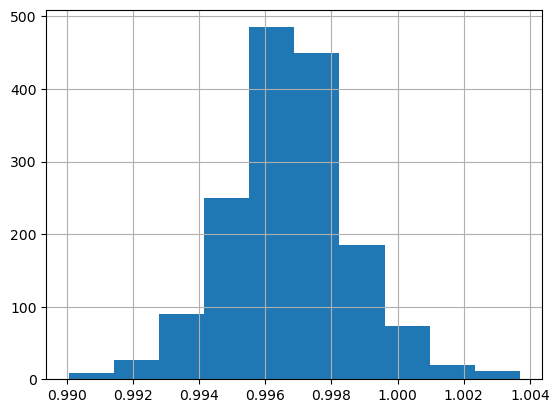

In [16]:
df.density.hist()

# Remote Work Data

# T-test

In [17]:
data = pd.read_csv("stackoverflow.csv")
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


### Subset

In [21]:
salary_uk = data.loc[data.Country == 'United Kingdom'].Salary
salary_de = data.loc[data.Country == 'Germany'].Salary

### T-test

In [26]:
stat, p = st.ttest_ind(a = salary_uk, b = salary_de)
print(p)
if p > 0.05:
    print('Both countries have similar salaries (fail to reject H0)')
else:
    print('There is a difference in salaries (reject H0)')

0.026389999555203502
There is a difference in salaries (reject H0)


### T-test in experience between India and United States

In [28]:
us_experience = data.loc[data.Country == 'United States'].YearsCodedJob
india_experience = data.loc[data.Country == 'India'].YearsCodedJob

### T-test

In [29]:
stat, p = st.ttest_ind(a = us_experience, b = india_experience)
print(p)
if p > 0.05:
    print('Both countries have similar experience (fail to reject H0)')
else:
    print('There is a difference in experience (reject H0)')

5.225676347614714e-58
There is a difference in experience (reject H0)


### Histograms

<Axes: >

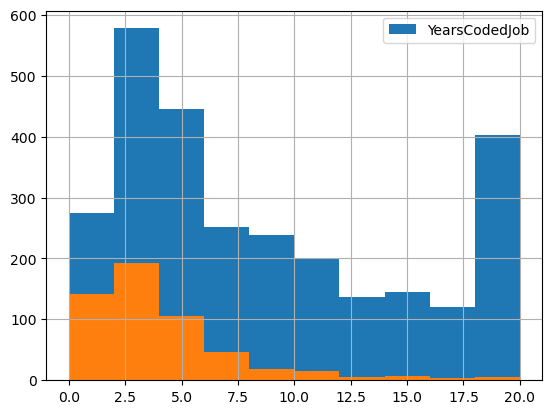

In [32]:
us_experience.hist(legend = True)
india_experience.hist()

# Chi-square test

### Cross tabulation

In [33]:
tab = pd.crosstab(index = data.Country,
                 columns = data.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


### Chi-square test

In [36]:
chi2, p, dof, exp = st.chi2_contingency(tab)
print(p)
if p > 0.05:
    print('There is no relationship (fail to reject H0)')
else:
    print('There is a strong relationship (reject H0)')

3.321120877301216e-16
There is a strong relationship (reject H0)


### Chi square test between company size and hobbies

In [37]:
tab = pd.crosstab(index = data.CompanySizeNumber,
                 columns = data.Hobby)
tab

Hobby,0,1
CompanySizeNumber,,
1,101,311
10,123,400
20,293,961
100,245,918
500,91,309
1000,180,436
5000,60,192
10000,243,731


### Chi-square test

In [38]:
chi2, p, dof, exp = st.chi2_contingency(tab)
print(p)
if p > 0.05:
    print('There is no relationship (fail to reject H0)')
else:
    print('There is a strong relationship (reject H0)')

0.025708455559671047
There is a strong relationship (reject H0)
